In [1]:
import pandas as pd
import numpy as np
import os

# Criação do diretório data_lake
if not os.path.exists("data_lake"):
    os.makedirs("data_lake")

# Número de arquivos e linhas por arquivo
num_files = 10
num_rows_per_file = 1000

# Lista de DataFrames
dfs = []

# Geração dos dados
for i in range(num_files):
    # Dados aleatórios
    data = {
        "coluna1": np.random.randint(0, 100, num_rows_per_file),
        "coluna2": np.random.randn(num_rows_per_file),
        "Coluna3": np.random.choice(["A", "B", "C"], num_rows_per_file),
    }

    # Criação do DataFrame
    df = pd.DataFrame(data)

    # Salvar o DataFrame em um arquivo CSV
    file_name = f"data_lake/dados_{i+1}.csv"
    df.to_csv(file_name, index=False)

    # Adicionar o DataFrame à lista
    dfs.append((file_name, df))

print("Dados do Data Lake gerados com sucesso!")

# Exibição dos dados
for file_name, df in dfs:
    print(f"\nDados do arquivo: {file_name}\n")
    print(df.head())

Dados do Data Lake gerados com sucesso!

Dados do arquivo: data_lake/dados_1.csv

   coluna1   coluna2 Coluna3
0       37  0.866858       A
1       55  0.924513       A
2       37 -0.825764       B
3       49  1.057453       B
4       34  0.084806       C

Dados do arquivo: data_lake/dados_2.csv

   coluna1   coluna2 Coluna3
0       10  0.773298       C
1       11 -1.576161       C
2       71  0.577569       C
3       38 -0.533345       A
4       44 -0.045091       B

Dados do arquivo: data_lake/dados_3.csv

   coluna1   coluna2 Coluna3
0       24  0.177172       B
1       95 -0.076816       A
2       46 -0.074438       C
3       71  1.465422       C
4        3  0.697326       A

Dados do arquivo: data_lake/dados_4.csv

   coluna1   coluna2 Coluna3
0        4  1.015475       C
1       67  0.029487       C
2       96  0.000933       A
3       48  0.618464       C
4       26  1.418061       A

Dados do arquivo: data_lake/dados_5.csv

   coluna1   coluna2 Coluna3
0       47  2.178347     

In [2]:
import pandas as pd
import numpy as np
import os
from sqlalchemy import create_engine

# Criação do diretório data_lake
if not os.path.exists("data_lake"):
    os.makedirs("data_lake")

# Número de arquivos e linhas por arquivo
num_files = 10
num_rows_per_file = 1000

# Lista de DataFrames
dfs = []

# Geração dos dados
for i in range(num_files):
    # Dados aleatórios
    data = {
        "coluna1": np.random.randint(0, 100, num_rows_per_file),
        "coluna2": np.random.randn(num_rows_per_file),
        "Coluna3": np.random.choice(["A", "B", "C"], num_rows_per_file),
    }

    # Criação do DataFrame
    df = pd.DataFrame(data)

    # Salvar o DataFrame em um arquivo CSV
    file_name = f"data_lake/dados_{i+1}.csv"
    df.to_csv(file_name, index=False)

    # Adicionar o DataFrame à lista
    dfs.append((file_name, df))

print("Dados do Data Lake gerados com sucesso!")

# Conexão com o banco de dados
conn_string = "sqlite:///data_lake.db"

# Criação do engine
engine = create_engine(conn_string)

# Salvar os DataFrames no banco de dados
for i, (file_name, df) in enumerate(dfs, 1):
    table_name = f"dados_{i}"
    df.to_sql(table_name, engine, index=False, if_exists="replace")

Dados do Data Lake gerados com sucesso!


Primeiras linhas do DataFrame:
   coluna1   coluna2 Coluna3
0       33 -0.295174       A
1       97  0.020244       C
2       27 -0.073162       B
3       19 -0.576596       A
4       70  0.163724       A

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coluna1  1000 non-null   int64  
 1   coluna2  1000 non-null   float64
 2   Coluna3  1000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB
None

Estatísticas do DataFrame:
           coluna1      coluna2
count  1000.000000  1000.000000
mean     50.768000    -0.043723
std      28.771374     1.003077
min       0.000000    -3.189525
25%      25.000000    -0.724545
50%      53.000000    -0.063428
75%      77.000000     0.605445
max      99.000000     3.512365


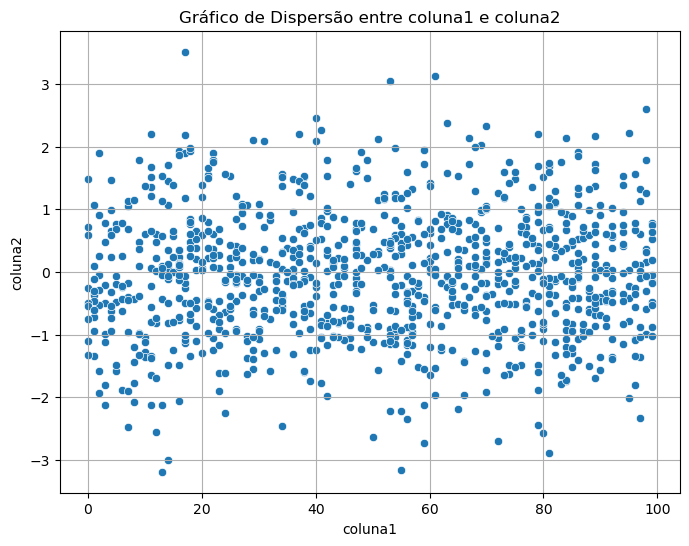

c:\Users\anrry\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


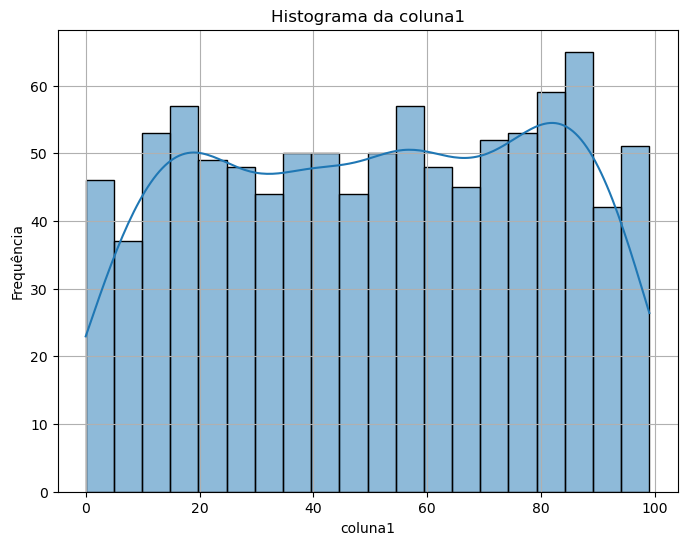

c:\Users\anrry\miniconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anrry\miniconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anrry\miniconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


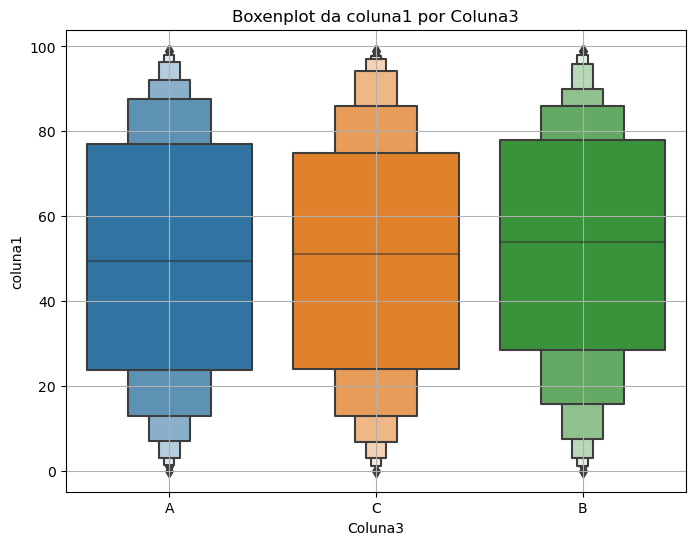

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Conexão com o banco de dados
conn_string = "sqlite:///data_lake.db"
engine = create_engine(conn_string)

# Leitura dos dados
table_name = "dados_1"  #
df = pd.read_sql_table(table_name, engine)

# Exibição dos dados
print("Primeiras linhas do DataFrame:")
print(df.head())

# Informações do DataFrame
print("\nInformações do DataFrame:")
print(df.info())

# Estatísticas do DataFrame
print("\nEstatísticas do DataFrame:")
print(df.describe())

# Gráficos
plt.figure(figsize=(8, 6))
sns.scatterplot(x="coluna1", y="coluna2", data=df)
plt.title("Gráfico de Dispersão entre coluna1 e coluna2")
plt.xlabel("coluna1")
plt.ylabel("coluna2")
plt.grid(True)
plt.show()

# Histograma
plt.figure(figsize=(8, 6))
sns.histplot(df["coluna1"], bins=20, kde=True)
plt.title("Histograma da coluna1")
plt.xlabel("coluna1")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

# Boxenplot
plt.figure(figsize=(8, 6))
sns.boxenplot(x="Coluna3", y="coluna1", data=df)
plt.title("Boxenplot da coluna1 por Coluna3")
plt.xlabel("Coluna3")
plt.ylabel("coluna1")
plt.grid(True)
plt.show()